In [77]:
import pandas as pd
import numpy as np
import pricey as pr
import yfinance as yf
import FinanceDataReader as fdr
from sklearn.decomposition import PCA, KernelPCA, FastICA
from tqdm.notebook import tqdm
import statsmodels.api as sm
import itertools

from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.preprocessing import StandardScaler, MinMaxScaler#, Imputer
from sklearn.cluster import KMeans

%matplotlib inline

In [78]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [79]:
univ = pd.read_excel('ticker_map.xlsx', converters={'code':str})
univ = list(univ['code']); univ

['005930',
 '005935',
 '000660',
 '006400',
 '006405',
 '051910',
 '051915',
 '005380',
 '005385',
 '035420',
 '068270',
 '000270',
 '035720',
 '105560',
 '005490',
 '055550',
 '207940',
 '012330',
 '373220',
 '028260',
 '086790',
 '033780',
 '066570',
 '066575',
 '096770',
 '316140',
 '017670',
 '034730',
 '003550',
 '030200',
 '009150',
 '259960',
 '036570',
 '323410',
 '000810',
 '009830',
 '015760',
 '032830',
 '051900',
 '010130',
 '011200',
 '003490',
 '034020',
 '003670',
 '011070',
 '018260',
 '402340',
 '028050',
 '009540',
 '010950',
 '010140',
 '352820',
 '047810',
 '097950',
 '090430',
 '034220',
 '021240',
 '000100',
 '035250',
 '086280',
 '032640',
 '251270',
 '000720',
 '011170',
 '267250',
 '004020',
 '024110',
 '161390',
 '377300',
 '010620',
 '005830',
 '011780',
 '008770',
 '383220',
 '271560',
 '006800',
 '329180',
 '071050',
 '012450',
 '018880',
 '078930',
 '016360',
 '011790',
 '001450',
 '139480',
 '010060',
 '128940',
 '138930',
 '004170',
 '030000',
 '302440',

In [80]:
_dflist = [fdr.DataReader(code, '2019-01-01', '2023-03-31')['Close'] for code in tqdm(univ)]

  0%|          | 0/147 [00:00<?, ?it/s]

In [82]:
p = pd.concat(_dflist, axis=1)
p.columns = univ
p.head()

,005930,005935,000660,006400,006405,051910,051915,005380,005385,035420,...,006650,192820,003850,105630,069500,232080,261220,132030,261240,148070
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,38750,31600,60600,210500,85800,337000,191500,114000,68600,118000,...,147500,122530,7557,19700,24086,11330,16065,9400,9610,115112
2019-01-03,37600,30800,57700,203000,83000,328000,186500,116500,69800,122000,...,139500,121059,7399,18950,23852,11068,16280,9440,9690,115150
2019-01-04,37450,30450,58300,201000,81200,330500,184000,119500,70400,125500,...,136000,123510,7452,19550,24034,11275,16925,9460,9665,114875
2019-01-07,38750,32100,58700,217000,85600,343000,190000,120500,70200,131500,...,148000,125470,7557,20650,24375,11358,17410,9425,9605,114922
2019-01-08,38100,30900,59200,218500,86100,349500,193500,119500,69900,130000,...,144000,125470,7511,21750,24220,11221,17330,9380,9645,114780


In [88]:
logp = np.log(p)

In [243]:
asof = '2023-02-28'
nback = 250
nfwd = 20

# _logp = logp.loc[:asof][-nlookback:].dropna(axis='columns')
# _logp_fwd = logp.loc[asof:][:nfwd][_logp.columns]; _logp_fwd

i_asof = logp.index.get_loc(asof)
_logp = logp.iloc[i_asof-nback+1:i_asof+nfwd+1].dropna(axis='columns')

In [245]:
_logp[:-nfwd]

,005930,005935,000660,006400,006405,051910,051915,005380,005385,035420,...,006650,192820,003850,105630,069500,232080,261220,132030,261240,148070
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-25,11.183032,11.098924,11.719940,13.197471,12.574182,13.224920,12.520883,12.066811,11.393015,12.658739,...,12.028739,11.346871,9.429476,9.989665,10.478133,9.439864,9.621125,9.467305,9.270965,11.649072
2022-02-28,11.185809,11.098924,11.723996,13.214031,12.581079,13.244581,12.508027,12.072541,11.379394,12.669807,...,12.043554,11.360939,9.429476,10.027915,10.485647,9.445412,9.640823,9.463043,9.271435,11.650581
2022-03-02,11.180246,11.089805,11.736069,13.212204,12.581079,13.226723,12.502467,12.046491,11.362103,12.666657,...,11.995352,11.370209,9.453287,10.045421,10.481561,9.463431,9.748587,9.478075,9.273785,11.655908
2022-03-03,11.196844,11.098924,11.767568,13.219490,12.593034,13.232114,12.515394,12.086726,11.387362,12.693118,...,12.007622,11.363265,9.461099,10.043249,10.500427,9.483721,9.802838,9.472705,9.272846,11.652948
2022-03-04,11.177453,11.089805,11.732061,13.176852,12.575911,13.190022,12.493130,12.058153,11.374812,12.668233,...,11.989160,11.346871,9.457200,10.034516,10.484837,9.460321,9.753536,9.478075,9.280333,11.652131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,11.020267,10.911445,11.397515,13.435713,12.629705,13.409045,12.624783,12.067959,11.428456,12.261980,...,12.151616,11.289782,9.109414,9.762500,10.373022,9.356171,9.533510,9.396820,9.369052,11.595933
2023-02-23,11.034890,10.916905,11.437124,13.431318,12.616525,13.412043,12.624783,12.079375,11.439279,12.271392,...,12.154253,11.302204,9.111624,9.751501,10.385605,9.358760,9.509333,9.393079,9.363919,11.600249
2023-02-24,11.023535,10.905956,11.418615,13.429848,12.623137,13.413539,12.611538,12.066236,11.427368,12.245293,...,12.100156,11.300969,9.113829,9.760194,10.376611,9.349232,9.535318,9.390159,9.369905,11.604410


In [197]:
class Basket:
    def __init__(self, *assets, univ=None, hedger=None, logp=None, logp_model=None):
        self.assets = list(assets)
        self.univ = univ
        self.hedger = hedger
        self.logp = logp
        self.logp_model = logp_model
        
        self.w = self.get_w()
        self.sp, self.sp_model = self.get_spreads()
        self.halflife = self.get_halflife()
        

    def get_w(self):
        n = len(self.assets)
        b = self.hedger[:, :n-1][self.univ.index(self.assets[0])]
        B = self.hedger[:, :n-1][[self.univ.index(asset) for asset in self.assets[1:]]]
        w = -b @ np.linalg.inv(B)
        w = np.insert(w, 0, 1)

        wp = w[w>0].sum()
        wm = -w[w<0].sum()
        
        return w / max(wp, wm)

    
    def get_spreads(self):
        r = self.logp[self.assets].diff().fillna(0) @ self.w
        sp = r.cumsum()

        r_model = self.logp_model[self.assets].diff().fillna(0) @ self.w
        sp_model = r_model.cumsum()
        sp_model -= (sp_model - sp).mean()

        return (sp - sp.mean()) / sp.std(), 
                (sp_model - sp.mean()) / sp.std()


    def get_halflife(self):
        _lag = np.roll(self.sp, 1)
        _lag[0] = 0
        _ret = self.sp - _lag
        _ret[0] = 0

        _lag2 = sm.add_constant(_lag)

        _model = sm.OLS(_ret, _lag2)
        res = _model.fit()

        return -np.log(2) / res.params[1]
    
        
        
class BasketBuilder:
    def __init__(self, logp, nfwd):
        self.logp_asof = _logp[:-nfwd]
        self.univ = list(logp.columns)
        self.dates = logp.index
        
        self.scaler = StandardScaler()
        self.logp_scaled = self.scaler.fit_transform(logp_asof)
        self.reducer = PCA(n_components=0.80, random_state=0)
        self.comp = self.reducer.fit_transform(self.logp_scaled)
        self.comp_std = self.comp.std(axis=0)

        self.logp_model = self.get_logp_model()
        self.hedger = self.reducer.components_.T * self.comp_std * logp.std().values.reshape(-1,1)
        
        self.n_assets = comp.shape[1] + 1
        self.assets_comb =  list(itertools.combinations(self.univ[:20], self.n_assets))
        self.baskets = self.get_baskets()

        
    def get_logp_model(self):
        _logp_model = self.scaler.inverse_transform(self.reducer.inverse_transform(self.comp))
        return pd.DataFrame(_logp_model, index=self.dates, columns=self.univ)
    
    
    def get_baskets(self):
        output = []
        for _assets in tqdm(self.assets_comb):
            bk = Basket(*_assets, univ=self.univ, hedger=self.hedger, logp=self.logp, logp_model=self.logp_model)
            output.append(bk)

        return output

In [211]:
builder = BasketBuilder(_logp)

  0%|          | 0/15504 [00:00<?, ?it/s]

In [214]:
ref = ['005930', '005935', '373220', '028260', '006400']

In [222]:
basket = list(filter(lambda b: len(set(b.assets) - set(ref))==0, builder.baskets))[0]
basket.assets

['005930', '005935', '006400', '373220', '028260']

<AxesSubplot:xlabel='Date'>

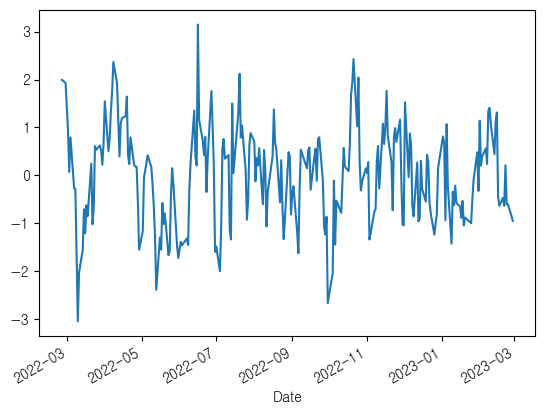

In [225]:
(-basket.sp).plot()

8.93302355893935

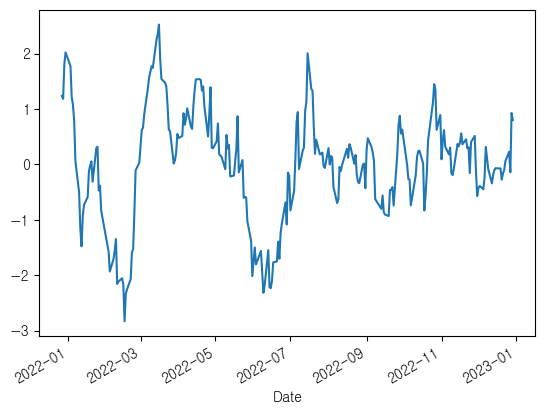

In [208]:
builder.baskets[10000].sp.plot()
builder.baskets[10000].halflife

In [213]:
len(set({1,2,3}) - set({1,3,2}))

0

In [147]:
df = pd.DataFrame(output).sort_values('halflife'); df

,assets,w,sp,halflife,profit,threshold
944,"[005935, 005930, 006400, 051910, 207940]","[-0.8665550024742796, 0.830115620674212, -0.09...",Date 2023-02-28 1.577209 2023-02-27 1.04...,1.620485,0.161998,0.651735
942,"[005935, 005930, 006400, 051910, 005490]","[-0.8859177145121634, 0.9375570719967942, -0.0...",Date 2023-02-28 1.977905 2023-02-27 1.28...,1.797349,0.168620,0.799973
1035,"[005935, 005930, 006400, 373220, 028260]","[-0.824241720060485, 0.7687787702601855, -0.14...",Date 2023-02-28 0.956883 2023-02-27 0.85...,1.829285,0.185248,0.811210
1026,"[005935, 005930, 006400, 207940, 012330]","[-0.8830129675332263, 0.8147298384064658, -0.0...",Date 2023-02-28 1.759556 2023-02-27 1.38...,1.866693,0.165442,0.794754
982,"[005935, 005930, 006400, 068270, 373220]","[-0.8329384955383019, 0.8269307867613076, -0.1...",Date 2023-02-28 0.755774 2023-02-27 0.39...,1.930462,0.152912,0.690614
...,...,...,...,...,...,...
3562,"[005935, 000270, 035720, 055550, 012330]","[-0.7684606384517633, 0.16874858758117692, 0.0...",Date 2023-02-28 0.868968 2023-02-27 0.65...,29.598266,0.221312,0.760020
3126,"[005935, 005380, 055550, 207940, 012330]","[-0.4606780338717711, 0.32739064433388637, 0.5...",Date 2023-02-28 0.879516 2023-02-27 0.53...,30.419830,0.222942,0.974269
3631,"[005935, 000270, 055550, 207940, 012330]","[-0.6593101343950124, 0.26331791295841633, 0.6...",Date 2023-02-28 1.038661 2023-02-27 0.88...,30.599074,0.244514,0.832147
10891,"[000660, 000270, 055550, 207940, 012330]","[-0.2869333871905464, 0.3583665153811839, 0.34...",Date 2023-02-28 0.861308 2023-02-27 0.74...,31.458919,0.196980,0.730603


In [188]:
df.iloc[0]

assets                [005935, 005930, 006400, 051910, 207940]
w            [-0.8665550024742796, 0.830115620674212, -0.09...
sp           Date
2023-02-28    1.577209
2023-02-27    1.04...
halflife                                              1.620485
profit                                                0.161998
threshold                                             0.651735
Name: 944, dtype: object

<AxesSubplot:xlabel='Date'>

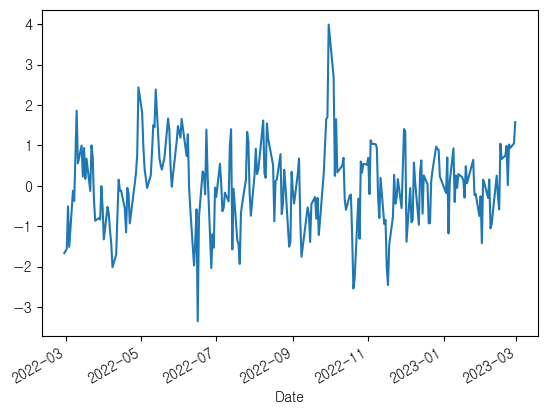

In [189]:
df.iloc[0].sp.plot()

<AxesSubplot:xlabel='profit', ylabel='halflife'>

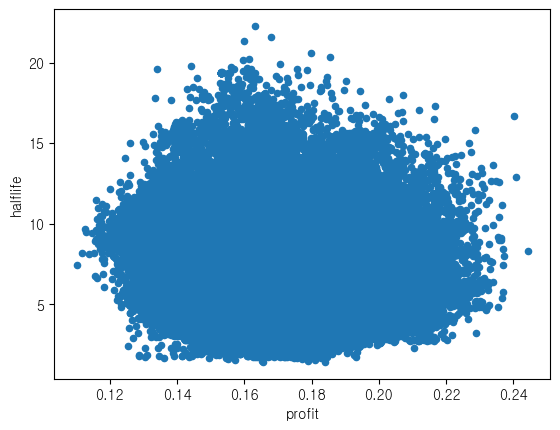

In [110]:
df.plot.scatter(x='profit', y='halflife')